In [1]:
#notebook dataset1
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud,ImageColorGenerator

In [2]:
data_path = "../../ressources/indiana_reports.csv"
data = pd.read_csv(data_path)

In [3]:
data.head()

,uid,MeSH,Problems,image,indication,comparison,findings,impression
0,1,normal,normal,Xray Chest PA and Lateral,Positive TB test,None.,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,2,Cardiomegaly/borderline;Pulmonary Artery/enlarged,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Preop bariatric surgery.,None.,Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,3,normal,normal,Xray Chest PA and Lateral,"rib pain after a XXXX, XXXX XXXX steps this XX...",NaN,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,4,"Pulmonary Disease, Chronic Obstructive;Bullous...","Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",XXXX-year-old XXXX with XXXX.,None available,There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,5,Osteophyte/thoracic vertebrae/multiple/small;T...,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,Chest and nasal congestion.,NaN,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [4]:
columns_to_remove = ["uid","MeSH","comparison","indication"]
data = data.drop(columns=columns_to_remove)
print("Données après suppression des colonnes :")
data.head()

Données après suppression des colonnes :


,Problems,image,findings,impression
0,normal,Xray Chest PA and Lateral,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,normal,Xray Chest PA and Lateral,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,"Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [5]:
data.shape

(3851, 4)

In [6]:
data.head()

,Problems,image,findings,impression
0,normal,Xray Chest PA and Lateral,The cardiac silhouette and mediastinum size ar...,Normal chest x-XXXX.
1,Cardiomegaly;Pulmonary Artery,"Chest, 2 views, frontal and lateral",Borderline cardiomegaly. Midline sternotomy XX...,No acute pulmonary findings.
2,normal,Xray Chest PA and Lateral,NaN,"No displaced rib fractures, pneumothorax, or p..."
3,"Pulmonary Disease, Chronic Obstructive;Bullous...","PA and lateral views of the chest XXXX, XXXX a...",There are diffuse bilateral interstitial and a...,1. Bullous emphysema and interstitial fibrosis...
4,Osteophyte;Thickening;Lung,Xray Chest PA and Lateral,The cardiomediastinal silhouette and pulmonary...,No acute cardiopulmonary abnormality.


In [7]:
missing_values = data.isnull().sum()
print(missing_values)

Problems        0
image           0
findings      514
impression     31
dtype: int64


In [8]:
data = data.dropna(subset=['findings','impression'])

In [9]:
missing_values = data.isnull().sum()
print(missing_values)

Problems      0
image         0
findings      0
impression    0
dtype: int64


In [10]:
data.findings.describe()

count                                                  3331
unique                                                 2547
top       The heart is normal in size. The mediastinum i...
freq                                                     51
Name: findings, dtype: object

In [11]:
data.impression.describe()

count                                      3331
unique                                     1346
top       No acute cardiopulmonary abnormality.
freq                                        301
Name: impression, dtype: object

In [12]:
data.Problems.describe()

count       3331
unique      1242
top       normal
freq        1195
Name: Problems, dtype: object

<Axes: xlabel='findings'>

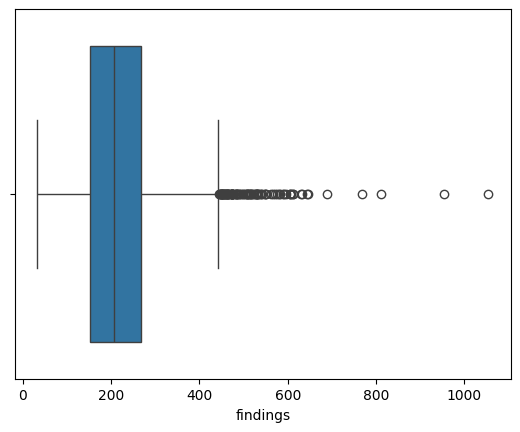

In [13]:
tmp = data.findings.str.len()
sns.boxplot(x=tmp)

<Axes: xlabel='findings'>

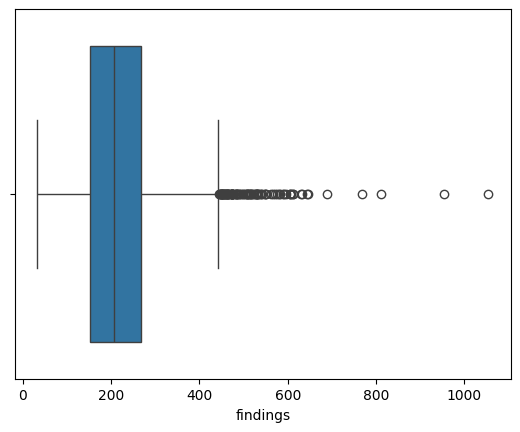

In [14]:
tmp = data.findings.str.len()
sns.boxplot(x=tmp)

Nettoyage des données manquantes

In [15]:
def generate_wordcloud(column_name):
    wordcloud = WordCloud(max_words=500, background_color="black", colormap="Set3").generate(' '.join(data[column_name].astype(str)))
    plt.figure(figsize=(15,10))
    plt.imshow(wordcloud, interpolation='Bilinear')
    plt.axis("off")
    plt.show()

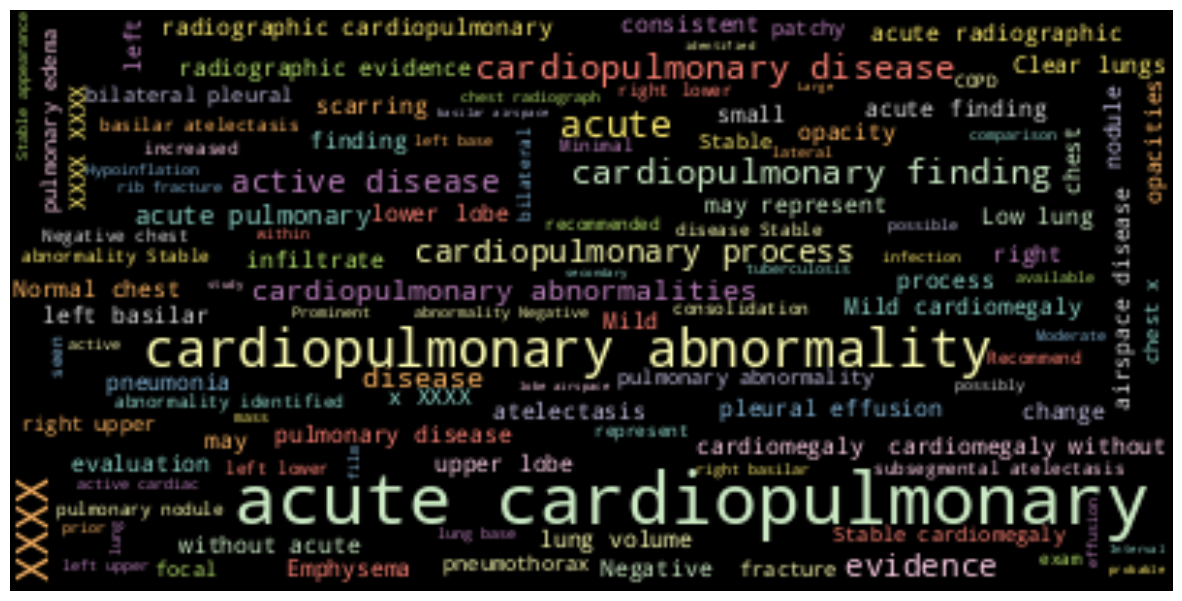

In [16]:
generate_wordcloud("impression")

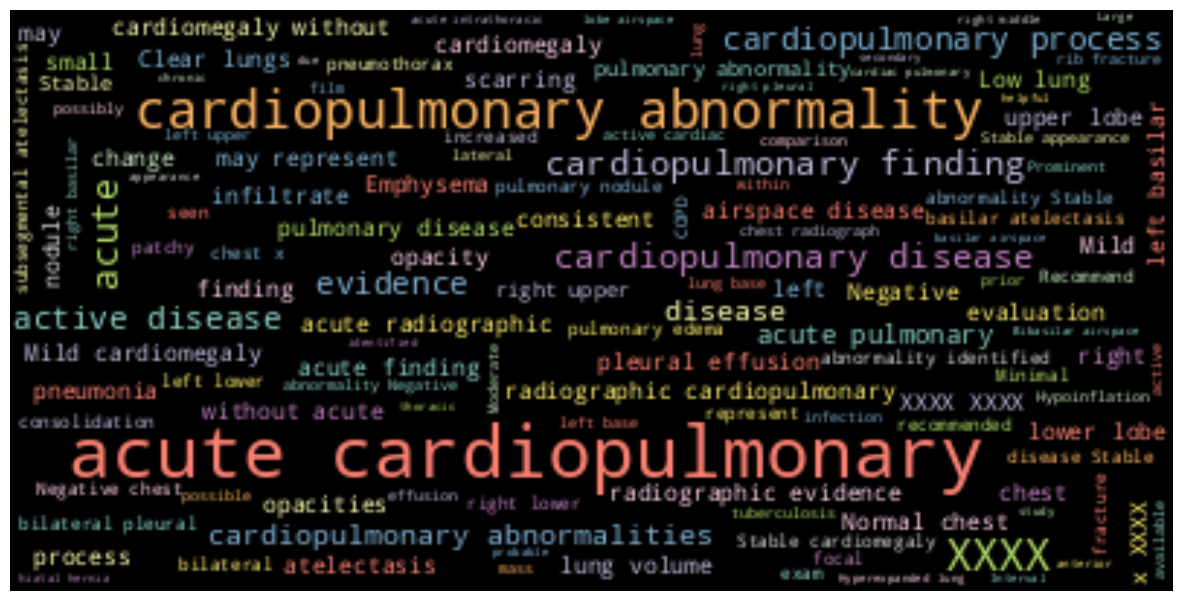

In [17]:
generate_wordcloud("impression")

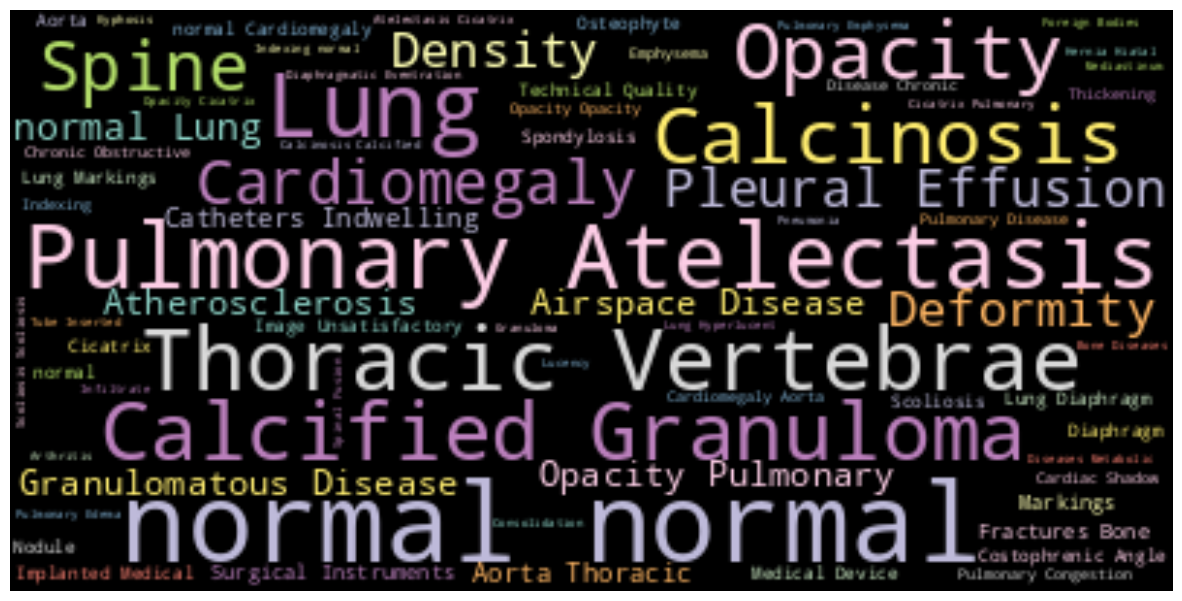

In [18]:
generate_wordcloud("Problems")

In [19]:
data.to_csv("../../data/cleaned/data1_cleaned.csv",index=False)